# Najboljše videoigre vseh časov

 **Projektna naloga pri predmetu Programiranje 1**

# 0. Priprava podatkov

Preden sploh lahko začnemo z analizo podatkov, moramo seveda pripravit vse potrebno. V ta namen uvozimo knjižnico pandas in vnesemo naše tabele.

In [44]:
import pandas as pd

pd.options.display.max_rows = 100

%matplotlib inline

igre = pd.read_csv("igre.csv")
zanri = pd.read_csv("zanri.csv")

In [45]:
igre

,id,naslov,platforma,studio,mesec,leto,metascore,glasovi metascore,userscore,glasovi userscore,oznaka,stevilo igralcev,opis
0,160692,The Legend of Zelda: Ocarina of Time,Nintendo 64,Nintendo,Nov,1998,99.0,22.0,9.1,5723.0,E,1.0,"As a young boy, Link is tricked by Ganondorf, ..."
1,160779,Tony Hawk's Pro Skater 2,PlayStation,Activision,Sep,2000,98.0,19.0,7.4,639.0,T,2.0,As most major publishers' development efforts ...
2,108362,Grand Theft Auto IV,PlayStation 3,Rockstar Games,Apr,2008,98.0,64.0,7.6,3797.0,M,1.0,What does the American Dream mean today? For N...
3,160751,SoulCalibur,Dreamcast,Namco,Sep,1999,98.0,24.0,8.5,321.0,T,2.0,"This is a tale of souls and swords, transcendi..."
4,108363,Grand Theft Auto IV,Xbox 360,Rockstar Games,Apr,2008,98.0,86.0,7.9,3360.0,M,1.0,What does the American Dream mean today? For N...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,215521,Atelier Ayesha: The Alchemist of Dusk,PlayStation 3,Koei Tecmo Games,Mar,2013,70.0,17.0,7.7,88.0,T,1.0,Atelier Ayesha: The Alchemist of Dusk follows ...
9996,182135,Payday: The Heist,PlayStation 3,Sony Online Entertainment,Oct,2011,70.0,30.0,6.4,83.0,M,NaN,Players will embark on a spectacular crime spr...
9997,182132,The Sims 3: Pets,PlayStation 3,Electronic Arts,Oct,2011,70.0,16.0,3.9,15.0,T,1.0,Players take creativity by the reins and play ...
9998,110061,Global Agenda,PC,Hi-Rez Studios,Feb,2010,70.0,16.0,7.8,356.0,T,NaN,Global Agenda is a massively multi-player acti...


In [3]:
zanri

,id,zanr
0,160692,Action Adventure
1,160692,Fantasy
2,160779,Sports
3,160779,Alternative
4,160779,Skateboarding
...,...,...
34181,110061,Massively Multiplayer Online
34182,110061,Massively Multiplayer
34183,110061,Sci-Fi
34184,502606,Action Adventure


# 1. Kaj pomeni "najboljša videoigra"?

Da bo naslov te projektne naloge opravičen, bi se spodobilo, da najprej dorečemo, kaj sploh pomeni, da je igra "najboljša". Igre so na spletni strani Metacritic, s katere sem prenesel podatke, razvrščene po oceni **metascore**. Tu jih bomo ocenjevali malo drugače.

Konstruirali bomo lastno metriko za rangiranje. Zakaj je to potrebno, se morda sprešuje bralec. Razlogov je več:
* Neobelani podatki so razvrščeni po **metascore** torej ocenah Strokovnjakov. Ne upoštevamo torej mnenja povprečnega igralca.
* Nikjer ne upoštevamo stevilo ocen, kar lahko pripelje do patoloških primerov. Igra ki ima 5 glasov in oceno 9.0 intuitivno seveda ni enako dobra, kot igra, ki ima 5000 glasov in oceno 8.5.
* Vendar pa bi radi upoštevali, da bo, do neke mere, igra z malo glasovi in dobro oceno boljša od igre z veliko glasovi, ki pravijo, da je zanič.

Dajmo najprej malo preučiti podatke, da vidimo s čim sploh imamo opravka:

###  Userscore

<AxesSubplot:xlabel='glasovi userscore', ylabel='userscore'>

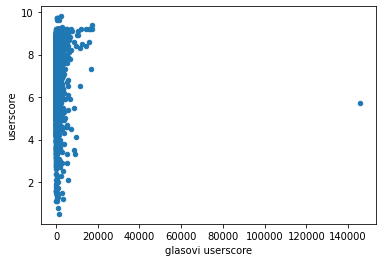

In [4]:
igre.plot.scatter(x="glasovi userscore", y="userscore")

In [5]:
igre[igre["glasovi userscore"] > 10 ** 5]

,id,naslov,platforma,studio,mesec,leto,metascore,glasovi metascore,userscore,glasovi userscore,oznaka,stevilo igralcev,opis
115,504733,The Last of Us Part II,PlayStation 4,SCEA,Jun,2020,93.0,121.0,5.7,145922.0,M,1.0,Five years after their dangerous journey acros...


Vredu, zanimiv začetek...

Za bralca, ki ni na tekočem s svetom videoiger, *The Last of Us* je bila ena najbolj uspešnih videoiger za *PlayStation 3* ter *PlayStation 4* in ena najbolj uspešnih videoiger na sploh. Je kakoničen primer, ko zagovarjaš, da igre niso samo streljačine, ampak cel umentniški medij, ki se lahko ob rob postavlja knjigi in filmu. Ko bomo iskali najboljše igre na teh platformah jo bomo gotovo našli.

Skratka, igra je izšla 2013 in uboževalci so čakali 7 let na njeno nadaljevanje, *The Last of Us Part II*, ki pa je bila dokaj kontroverzna. Oddalila se je od sporočila prve igre in se usmerila v LGBT pride vsebine. To, skupaj z napihnjenimi pričakovanji občinstva je pomenilo, da je imelo veliko ljudi kaj za povedat in to se ravno tu pozna.

Morda se sedaj osredotočimo tja, kjer je glavnina podatkov.

<AxesSubplot:xlabel='glasovi userscore', ylabel='userscore'>

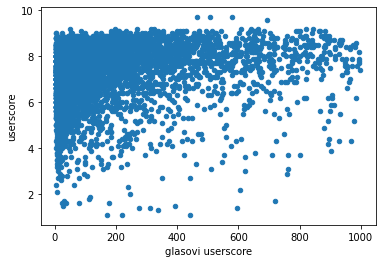

In [6]:
igre[igre["glasovi userscore"] < 1000].plot.scatter(x="glasovi userscore", y="userscore")

Vidimo, da več kot je glasov, boljše igre imamo. Torej je smiselno število glasov upoštevati pri naši oceni. Radi bi upoštevali zgornje točke, tako da naredimo sledeče:

**prilagojen userscore** izračunamo po naslednji formuli: `Up = U * (Gu / (Gu + GuAv))`  
kjer je `U` prvotna ocena, `Gu` število glasov in `GuAv` povprečno število glasov.

S tem smo dosegli sledeče:
* Igre z visoko oceno in velikim številom glasov, bodo obdržale prestižno oceno.
* Igre z nizko oceno in velikim številom glasov, bodo ostale slabo ocenjene.
* Igre z sicer malo glasovi, ampak res dobro oceno, bodo povprečno ali celo nadpovprečno ocenjene.
* Za igre z nizko oceno in malo glasovi smatramo, da niso dovolj popularne, zato se njihova ocena zmanjša.

Če je glasov veliko, ocena ostane skoraj enaka. Če pa je glasov malo, se ocena temu primerno prilagodi, pri čimer pa lahko kaka res dobra igra vseeno izstopa.
Tako smo graf ocene v odvisnosti od glasov nekoliko linealizirali.

In [47]:
def prilagodi_glasove_userscore(tabela_iger):
    def prilagodi(ocena, st_glasov, medijana_glasov):
        return round(((st_glasov) / (st_glasov + medijana_glasov)) * ocena, 2)
    
    tabela_iger["prilagojen userscore"] = prilagodi(
        tabela_iger["userscore"], tabela_iger["glasovi userscore"], (tabela_iger["glasovi userscore"]).mean()
    )
prilagodi_glasove_userscore(igre)

<AxesSubplot:xlabel='glasovi userscore', ylabel='prilagojen userscore'>

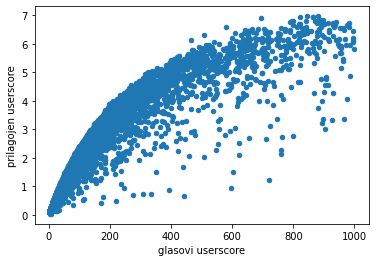

In [8]:
igre[igre["glasovi userscore"] < 1000].plot.scatter(x="glasovi userscore", y="prilagojen userscore")

### Metascore

<AxesSubplot:xlabel='glasovi metascore', ylabel='metascore'>

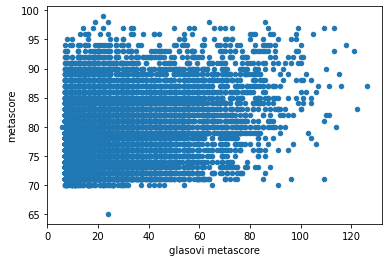

In [9]:
igre.plot.scatter(x="glasovi metascore", y="metascore")

Tu opazimo da kvaliteta iger s številom glasov ne narašča. To je za pričakovati, saj proivajalci pogosto podarijo igro ocenjevalce, da naredijo oceno. 

Število glasov je torej v veliki meri odvisno od podjetji in ga zato tu ne bomo upoštevali. Pravtako igre oceni veliko manj ljudi in so zato števila glasov bolj blizu skupaj.

Oceno strokovnjakov bomo le delili z 10, da bosta userscore in metascore števili istega reda velikosti.

In [48]:
def prilagodi_glasove_metascore(tabela_iger):
    tabela_iger["prilagojen metascore"] = tabela_iger["metascore"] / 10

prilagodi_glasove_metascore(igre)

### Prilagojena ocena

Naša prilagojena ocena bo vlota prilagojenega metascora in userscora.

In ko smo ravno pri tem, bomo še odstranili igre, ki niso ocenjene.

In [49]:
def prilagojena_ocena(tabela_iger):
    tabela_iger["prilagojena ocena"] = tabela_iger["prilagojen userscore"] + tabela_iger["prilagojen metascore"]
    tabela_iger.dropna(subset=["prilagojena ocena"], inplace=True)

prilagojena_ocena(igre)
igre

,id,naslov,platforma,studio,mesec,leto,metascore,glasovi metascore,userscore,glasovi userscore,oznaka,stevilo igralcev,opis,prilagojen userscore,prilagojen metascore,prilagojena ocena
0,160692,The Legend of Zelda: Ocarina of Time,Nintendo 64,Nintendo,Nov,1998,99.0,22.0,9.1,5723.0,E,1.0,"As a young boy, Link is tricked by Ganondorf, ...",8.69,9.9,18.59
1,160779,Tony Hawk's Pro Skater 2,PlayStation,Activision,Sep,2000,98.0,19.0,7.4,639.0,T,2.0,As most major publishers' development efforts ...,5.19,9.8,14.99
2,108362,Grand Theft Auto IV,PlayStation 3,Rockstar Games,Apr,2008,98.0,64.0,7.6,3797.0,M,1.0,What does the American Dream mean today? For N...,7.09,9.8,16.89
3,160751,SoulCalibur,Dreamcast,Namco,Sep,1999,98.0,24.0,8.5,321.0,T,2.0,"This is a tale of souls and swords, transcendi...",4.61,9.8,14.41
4,108363,Grand Theft Auto IV,Xbox 360,Rockstar Games,Apr,2008,98.0,86.0,7.9,3360.0,M,1.0,What does the American Dream mean today? For N...,7.31,9.8,17.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,215521,Atelier Ayesha: The Alchemist of Dusk,PlayStation 3,Koei Tecmo Games,Mar,2013,70.0,17.0,7.7,88.0,T,1.0,Atelier Ayesha: The Alchemist of Dusk follows ...,1.89,7.0,8.89
9996,182135,Payday: The Heist,PlayStation 3,Sony Online Entertainment,Oct,2011,70.0,30.0,6.4,83.0,M,NaN,Players will embark on a spectacular crime spr...,1.50,7.0,8.50
9997,182132,The Sims 3: Pets,PlayStation 3,Electronic Arts,Oct,2011,70.0,16.0,3.9,15.0,T,1.0,Players take creativity by the reins and play ...,0.20,7.0,7.20
9998,110061,Global Agenda,PC,Hi-Rez Studios,Feb,2010,70.0,16.0,7.8,356.0,T,NaN,Global Agenda is a massively multi-player acti...,4.43,7.0,11.43


Sedaj imamo našo metriko za ocenjevanje iger in prava analiza podatkov se lahko prične.

Poglejmo si katere videoigre so najboljše:

In [50]:
igre.sort_values("prilagojena ocena", ascending=False).head(20)

,id,naslov,platforma,studio,mesec,leto,metascore,glasovi metascore,userscore,glasovi userscore,oznaka,stevilo igralcev,opis,prilagojen userscore,prilagojen metascore,prilagojena ocena
0,160692,The Legend of Zelda: Ocarina of Time,Nintendo 64,Nintendo,Nov,1998,99.0,22.0,9.1,5723.0,E,1.0,"As a young boy, Link is tricked by Ganondorf, ...",8.69,9.9,18.59
110,231309,The Witcher 3: Wild Hunt,PC,Warner Bros. Interactive Entertainment,May,2015,93.0,32.0,9.4,17482.0,M,1.0,With the Empire attacking the Kingdoms of the ...,9.26,9.3,18.56
58,305096,The Last of Us Remastered,PlayStation 4,SCEA,Jul,2014,95.0,70.0,9.2,14486.0,M,8.0,The Last of Us has been rebuilt for the PlaySt...,9.03,9.5,18.53
53,197529,The Last of Us,PlayStation 3,SCEA,Jun,2013,95.0,98.0,9.2,11951.0,M,8.0,Twenty years after a pandemic radically transf...,9.00,9.5,18.50
22,103028,Half-Life 2,PC,VU Games,Nov,2004,96.0,81.0,9.1,10760.0,M,1.0,"By taking the suspense, challenge and visceral...",8.88,9.6,18.48
69,499358,God of War,PlayStation 4,Sony Interactive Entertainment,Apr,2018,94.0,118.0,9.2,16214.0,M,1.0,His vengeance against the gods of Olympus far ...,9.05,9.4,18.45
59,142928,Portal 2,PC,Valve Software,Apr,2011,95.0,52.0,9.1,7471.0,E10+,NaN,Valve is working on a full-length sequel to it...,8.78,9.5,18.28
215,234332,The Witcher 3: Wild Hunt,PlayStation 4,Warner Bros. Interactive Entertainment,May,2015,92.0,79.0,9.2,15712.0,M,1.0,With the Empire attacking the Kingdoms of the ...,9.04,9.2,18.24
19,506420,Super Mario Odyssey,Switch,Nintendo,Oct,2017,97.0,113.0,8.9,5532.0,E10+,1.0,New Evolution of Mario Sandbox-Style Gameplay....,8.48,9.7,18.18
12,506409,The Legend of Zelda: Breath of the Wild,Switch,Nintendo,Mar,2017,97.0,109.0,8.6,15834.0,E10+,1.0,Forget everything you know about The Legend of...,8.46,9.7,18.16


Sedaj pa uredimo igre po prilagojeni oceni in jih preindeksiramo. Tako bomo lahko hitro videli katera igra po vrsti je na seznamu.

In [51]:
igre = igre.sort_values("prilagojena ocena", ascending=False)
igre.reset_index(drop=True, inplace=True)

In [52]:
igre

,id,naslov,platforma,studio,mesec,leto,metascore,glasovi metascore,userscore,glasovi userscore,oznaka,stevilo igralcev,opis,prilagojen userscore,prilagojen metascore,prilagojena ocena
0,160692,The Legend of Zelda: Ocarina of Time,Nintendo 64,Nintendo,Nov,1998,99.0,22.0,9.1,5723.0,E,1.0,"As a young boy, Link is tricked by Ganondorf, ...",8.69,9.9,18.59
1,231309,The Witcher 3: Wild Hunt,PC,Warner Bros. Interactive Entertainment,May,2015,93.0,32.0,9.4,17482.0,M,1.0,With the Empire attacking the Kingdoms of the ...,9.26,9.3,18.56
2,305096,The Last of Us Remastered,PlayStation 4,SCEA,Jul,2014,95.0,70.0,9.2,14486.0,M,8.0,The Last of Us has been rebuilt for the PlaySt...,9.03,9.5,18.53
3,197529,The Last of Us,PlayStation 3,SCEA,Jun,2013,95.0,98.0,9.2,11951.0,M,8.0,Twenty years after a pandemic radically transf...,9.00,9.5,18.50
4,103028,Half-Life 2,PC,VU Games,Nov,2004,96.0,81.0,9.1,10760.0,M,1.0,"By taking the suspense, challenge and visceral...",8.88,9.6,18.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,322597,Fenix Furia,PlayStation 4,Green Lava Studios,Jun,2016,71.0,8.0,5.0,4.0,E,NaN,"Fenix Rage is a stylish, aggravatingly addicti...",0.07,7.1,7.17
9705,163033,Eragon,Game Boy Advance,Sierra Entertainment,Nov,2006,70.0,12.0,7.5,6.0,E10+,1.0,Play as Eragon and his dragon as they set out ...,0.16,7.0,7.16
9706,163252,Still Life,Xbox,The Adventure Company,Jun,2005,70.0,29.0,7.0,6.0,M,1.0,"In Still Life, you play the role of Victoria M...",0.15,7.0,7.15
9707,531025,Sparklite,PC,Merge Games,Nov,2019,70.0,7.0,6.5,6.0,E10+,1.0,Sparklite is an action-adventure set in the wh...,0.14,7.0,7.14


# 2. TBA

## Usersocre vs Metascore

Že smo omelnili razkiko med oceno Userscore in Metascore. Dajmo to raziskati bolj podrobno.

Metascore je ocena *strokovnjakov* na podaročju videoiger. Ti preigraji igro ob izzidu in so vir prvih informacij o kvaliteti. Iz istega razloga, pa podjetja skušajo dobiti dobre ocene, na račun daril in podobnega.

Userscore je ocena običajnih igralcev ali uporabnikov. Ti običajno preživijo več časa z igro in zato nudijo bolj dologoročno mnenje.

Poglejmo si, kakšne razlike lahko opazimo.

<AxesSubplot:xlabel='prilagojen metascore', ylabel='prilagojen userscore'>

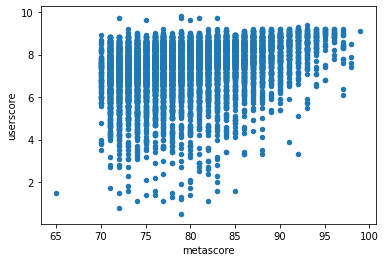

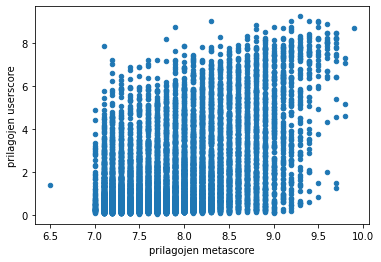

In [14]:
igre.plot.scatter(x="metascore", y="userscore")
igre.plot.scatter(x="prilagojen metascore", y="prilagojen userscore")

Nič presenetljivega ne opazimo, točke so precej enakomerno porazdeljene. Morda res vidimo, da se oba tabora strinjata pri kvaliteti najboljših iger. Toda lahko izluščimo nekaj zelo zanimivega.

Ne smemo pozabiti, da so surovi podatki 10000 iger z najboljšim metascorom. Vendar pa pri userscoru vidimo izredno varianco. Torej so igre, ki jih strokovnjaki ocenjujejo nadpovprečno vseeno zelo mešane kvalitete. Prvi graf to namiguje, drugi pa potrdi.

Sklepamo lahko, da se mnenja strokovnjakov in uporabnikov nujnone ujemajo.

## Katere igre so najboljše

Preden odgovorimo na to vprašanje, bomo ločili igre glede na platformo. Različna strojna oprema in različna implementacija pomeni, da se lahko kvaliteta od platforme do platforme precej razlikuje. Zato bomo v določenih pogledih obravnavali najboljše igre na vsaki platformi posebej.

In [15]:
igre.platforma.unique()

array(['Nintendo 64', 'PC', 'PlayStation 4', 'PlayStation 3', 'Switch',
       'Wii', 'Xbox 360', 'Xbox One', 'PlayStation 2', 'GameCube',
       'PlayStation', 'Xbox', 'Wii U', '3DS', 'PlayStation Vita', 'DS',
       'PSP', 'Game Boy Advance', 'Dreamcast', 'Stadia'], dtype=object)

Na tem mestu bomo iz nadaljne analize izvzeli igre, ki so na platformi *Stadia*. No dve igri, pravzaprav:

In [16]:
igre[igre["platforma"] == "Stadia"]

,index,id,naslov,platforma,studio,mesec,leto,metascore,glasovi metascore,userscore,glasovi userscore,oznaka,stevilo igralcev,opis,prilagojen userscore,prilagojen metascore,prilagojena ocena
6621,3680,543556,Get Packed,Stadia,Coatsink Software,Apr,2020,81.0,8.0,7.3,13.0,E10+,1.0,Get Packed is a couch co-op removals game with...,0.33,8.1,8.43
8928,8172,548067,Orcs Must Die! 3,Stadia,Robot Entertainment,Jul,2020,73.0,15.0,7.1,14.0,T,1.0,Orcs Must Die! 3 ushers orc-slaying mayhem to ...,0.35,7.3,7.65


*Stadia* je *Cloud gaming service*, ki ga je razvil Google. Ideja je preprosta. Z mesečno naročnino imaš dostop do računalniške strojne opreme, ki jo nudi Google, tako da doma ne rabiš imet najzmožnejših konzol. Rabiš samo ekran, tipkovnico ali kontroler in dovolj dobro internetno povezavo. Ideja je v teoriji sicer dobra, vendar se je v praksi nekako ni tako zelo prijelo. 

Dejstvo, da sta med 10.000 najboljšimi igrami, le dve s te konzole, je dokaz tega in bomo zato brez salbe vesti *Stadio* izvzeli iz nadaljne analize.

In [17]:
seznam_platform = igre[igre["platforma"] != "Stadia"]["platforma"].unique()
seznam_platform 

array(['Nintendo 64', 'PC', 'PlayStation 4', 'PlayStation 3', 'Switch',
       'Wii', 'Xbox 360', 'Xbox One', 'PlayStation 2', 'GameCube',
       'PlayStation', 'Xbox', 'Wii U', '3DS', 'PlayStation Vita', 'DS',
       'PSP', 'Game Boy Advance', 'Dreamcast'], dtype=object)

In [18]:
igre_po_platformi = {}

for platforma in seznam_platform:
    igre_po_platformi[platforma] = igre[igre.platforma == platforma]

igre_po_platformi["PC"]

,index,id,naslov,platforma,studio,mesec,leto,metascore,glasovi metascore,userscore,glasovi userscore,oznaka,stevilo igralcev,opis,prilagojen userscore,prilagojen metascore,prilagojena ocena
1,110,231309,The Witcher 3: Wild Hunt,PC,Warner Bros. Interactive Entertainment,May,2015,93.0,32.0,9.4,17482.0,M,1.0,With the Empire attacking the Kingdoms of the ...,9.26,9.3,18.56
4,22,103028,Half-Life 2,PC,VU Games,Nov,2004,96.0,81.0,9.1,10760.0,M,1.0,"By taking the suspense, challenge and visceral...",8.88,9.6,18.48
6,59,142928,Portal 2,PC,Valve Software,Apr,2011,95.0,52.0,9.1,7471.0,E10+,NaN,Valve is working on a full-length sequel to it...,8.78,9.5,18.28
10,36,100055,Half-Life,PC,Sierra Entertainment,Nov,1998,96.0,24.0,9.0,4316.0,M,1.0,Half-Life combines great storytelling in the t...,8.47,9.6,18.07
13,209,101386,Team Fortress 2,PC,Electronic Arts,Oct,2007,92.0,17.0,9.1,6719.0,M,32.0,Team Fortress 2 (TF2) is the sequel to the gam...,8.75,9.2,17.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9684,9869,517381,Masters of Anima,PC,Focus Home Interactive,Apr,2018,71.0,7.0,5.2,6.0,NaN,1.0,Delve into an original adventure and defy the ...,0.11,7.1,7.21
9685,9946,219053,Harold,PC,Moon Spider Studio,Feb,2015,70.0,17.0,6.0,10.0,NaN,NaN,Harold is a singleplayer sidescrolling platfor...,0.21,7.0,7.21
9699,9796,104324,Sentinel: Descendants in Time,PC,The Adventure Company,Dec,2004,71.0,16.0,6.0,4.0,E,1.0,The Tastan civilization succumbed to extinctio...,0.09,7.1,7.19
9700,9596,547162,Willy Morgan and the Curse of Bone Town,PC,imaginarylab,Aug,2020,71.0,16.0,6.5,4.0,NaN,1.0,"A letter from 10 years ago, an intricate web o...",0.09,7.1,7.19


Sedaj opravičimo ime projektne naloge in poglejmo katere igre so res najboljše.

In [62]:
igre[["naslov", "platforma", "prilagojena ocena"]].head(20)

,naslov,platforma,prilagojena ocena
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,18.59
1,The Witcher 3: Wild Hunt,PC,18.56
2,The Last of Us Remastered,PlayStation 4,18.53
3,The Last of Us,PlayStation 3,18.50
4,Half-Life 2,PC,18.48
5,God of War,PlayStation 4,18.45
6,Portal 2,PC,18.28
7,The Witcher 3: Wild Hunt,PlayStation 4,18.24
8,Super Mario Odyssey,Switch,18.18
9,The Legend of Zelda: Breath of the Wild,Switch,18.16


Dajmo si še pogledat, katere najbolj priljubljene igre na posamezni platformi:

In [20]:
for platforma in igre_po_platformi:
    display(platforma)
    display(igre_po_platformi[platforma][["naslov", "prilagojena ocena"]].sort_values(
        "prilagojena ocena", ascending=False).head(5))

'Nintendo 64'

,naslov,prilagojena ocena
0,The Legend of Zelda: Ocarina of Time,18.59
81,The Legend of Zelda: Majora's Mask,16.99
82,Super Mario 64,16.98
212,GoldenEye 007,16.00
396,Perfect Dark,15.11


'PC'

,naslov,prilagojena ocena
1,The Witcher 3: Wild Hunt,18.56
4,Half-Life 2,18.48
6,Portal 2,18.28
10,Half-Life,18.07
13,Team Fortress 2,17.95


'PlayStation 4'

,naslov,prilagojena ocena
2,The Last of Us Remastered,18.53
5,God of War,18.45
7,The Witcher 3: Wild Hunt,18.24
14,Red Dead Redemption 2,17.94
16,Bloodborne,17.87


'PlayStation 3'

,naslov,prilagojena ocena
3,The Last of Us,18.50
11,Uncharted 2: Among Thieves,18.06
22,Red Dead Redemption,17.74
30,Metal Gear Solid 4: Guns of the Patriots,17.65
33,Batman: Arkham City,17.61


'Switch'

,naslov,prilagojena ocena
8,Super Mario Odyssey,18.18
9,The Legend of Zelda: Breath of the Wild,18.16
60,Super Smash Bros. Ultimate,17.14
91,Astral Chain,16.91
109,Mario Kart 8 Deluxe,16.75


'Wii'

,naslov,prilagojena ocena
12,Super Mario Galaxy,17.96
15,Super Mario Galaxy 2,17.91
46,The Legend of Zelda: Twilight Princess,17.36
73,Super Smash Bros. Brawl,17.06
102,Xenoblade Chronicles,16.85


'Xbox 360'

,naslov,prilagojena ocena
17,Mass Effect 2,17.86
26,Red Dead Redemption,17.71
29,The Elder Scrolls V: Skyrim,17.65
31,BioShock,17.65
41,Grand Theft Auto V,17.46


'Xbox One'

,naslov,prilagojena ocena
19,The Witcher 3: Wild Hunt,17.81
97,Red Dead Redemption 2,16.88
163,Ori and the Will of the Wisps,16.40
191,Grand Theft Auto V,16.13
228,Forza Horizon 4,15.91


'PlayStation 2'

,naslov,prilagojena ocena
27,Grand Theft Auto: San Andreas,17.69
50,Resident Evil 4,17.31
70,Metal Gear Solid 2: Sons of Liberty,17.08
74,God of War,17.06
100,Final Fantasy X,16.86


'GameCube'

,naslov,prilagojena ocena
40,Resident Evil 4,17.46
66,The Legend of Zelda: The Wind Waker,17.11
69,Metroid Prime,17.09
171,The Legend of Zelda: Twilight Princess,16.29
190,Super Smash Bros. Melee,16.13


'PlayStation'

,naslov,prilagojena ocena
52,Final Fantasy VII,17.27
53,Metal Gear Solid,17.25
104,Final Fantasy IX,16.83
202,Tekken 3,16.05
225,Final Fantasy VIII,15.92


'Xbox'

,naslov,prilagojena ocena
55,Halo: Combat Evolved,17.21
115,Halo 2,16.71
455,Star Wars: Knights of the Old Republic,14.87
942,Tom Clancy's Splinter Cell Chaos Theory,13.41
1048,Fable,13.13


'Wii U'

,naslov,prilagojena ocena
59,Super Mario 3D World,17.14
75,Super Smash Bros. for Wii U,17.05
89,The Legend of Zelda: Breath of the Wild,16.91
143,Mario Kart 8,16.51
146,Bayonetta 2,16.49


'3DS'

,naslov,prilagojena ocena
65,The Legend of Zelda: Ocarina of Time 3D,17.11
98,Fire Emblem: Awakening,16.88
112,The Legend of Zelda: A Link Between Worlds,16.72
229,Super Mario 3D Land,15.89
333,Animal Crossing: New Leaf,15.35


'PlayStation Vita'

,naslov,prilagojena ocena
110,Persona 4 Golden,16.72
583,Gravity Rush,14.43
637,Tearaway,14.26
780,Killzone: Mercenary,13.84
820,LittleBigPlanet PS Vita,13.75


'DS'

,naslov,prilagojena ocena
219,Ghost Trick: Phantom Detective,15.95
264,Pokemon SoulSilver Version,15.66
269,Pokemon HeartGold Version,15.63
271,Chrono Trigger,15.63
366,Mario Kart DS,15.25


'PSP'

,naslov,prilagojena ocena
307,God of War: Chains of Olympus,15.47
429,Metal Gear Solid: Peace Walker,14.96
549,Crisis Core: Final Fantasy VII,14.54
587,Z.H.P. Unlosing Ranger vs Darkdeath Evilman,14.42
644,Final Fantasy Tactics: The War of the Lions,14.23


'Game Boy Advance'

,naslov,prilagojena ocena
316,The Legend of Zelda: A Link to the Past,15.43
578,Final Fantasy VI Advance,14.45
713,Metroid Fusion,14.01
734,Pokemon Emerald Version,13.96
747,The Legend of Zelda: The Minish Cap,13.94


'Dreamcast'

,naslov,prilagojena ocena
592,SoulCalibur,14.41
687,Sonic Adventure 2,14.07
795,Shenmue II,13.81
1462,Resident Evil 3: Nemesis,12.34
1592,Skies of Arcadia,12.11


## Katera platforma je nabolj uspešna?

Poglejmo, katera platforma je bila najbolj uspešna. Enesotavno preštejmo, koliko iger se je pojavilo v naših podatkih:

<AxesSubplot:xlabel='platforma'>

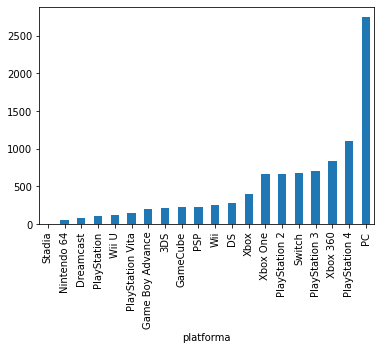

In [21]:
st_iger_na_platformo = igre.groupby("platforma").size().sort_values()
st_iger_na_platformo.plot.bar()

Da je računalnik najbolj priljubljena platforma nas ne preseneča. Je na nek način nekoliko nepošteno primerjati konzole z račualnikom saj se računalniki s časoma spreminjajo, izboljšujejo strojno opremo pa vendar ostajajo pod istom imenom. Konzole pa izzideje z neko strojno opremo in ko je ta zastarela izide naslednja generacija konzol.

Tako imamo sosledsta *PlayStation 2*, *PlayStation 3*, *PlayStation 4* in *Xbox*, *Xbox 360*, *Xbox One*.

Med konzolami so torej najboljše *PlayStation 4*, *Xbox 360*, *PlayStation 3*.

Če smo se že tako trudili, sa smo naredili lastno metriko, poglejmo, na katerih konzolah se pojavijo najboljše igre.

<AxesSubplot:xlabel='platforma'>

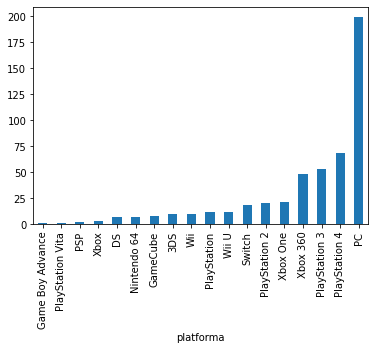

In [63]:
najboljse_igre = igre.head(500)
st_iger_na_platformo_najboljse = najboljse_igre.groupby("platforma").size().sort_values()
st_iger_na_platformo_najboljse.plot.bar()

Opazimo zelo podobne rezultate. Med konzolami še vedno prevladuje *PlayStation 4*, tik za petami pa mu je tokrat ročna konzola *Switch* in nato *PlayStation 2*.

Pozoren bralec bo opazil, da se igre z istim imenom pojavijo večkrat po različnih platformah. Kot rečeno, se lahko izkušnja od platforme do platforme precej razlikuje. *PlayStation 4* ima naprimer kontroler, ki se trese, med tem ko igraš. *Switch* ti nudi igranje na poti, *PC* pa seveda najboljše grafične zmogljivosti.

To, da pa igre nastopojo na različnijh platformah nam da izvrstno priložnost, da jih med sabo primerjamo. Izkušnja ne bo odvisna od vsebine igre, temveč samo od zmožnosti platforme.

In [23]:
naslovi = igre.naslov.unique()
veckratni = []
for naslov in naslovi:
    if igre.groupby("naslov").size()[naslov] > 1:
        veckratni.append(naslov)

In [24]:
score = {}
for naslov in veckratni:
    top_platforma = igre[igre.naslov == naslov].sort_values("prilagojena ocena").iloc[0]["platforma"]
    if top_platforma in score.keys():
        score[top_platforma] += 1
    else:
        score[top_platforma] = 1

<AxesSubplot:xlabel='Platforme'>

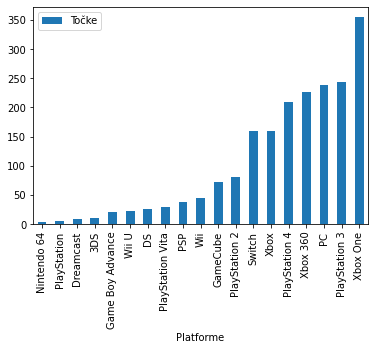

In [25]:
konzole = pd.DataFrame(list(score.items()), columns = ['Platforme','Točke']).sort_values("Točke")
konzole.plot.bar(x="Platforme", y="Točke")

Rezultati presenetljivo prikazujejo, da je najbolje igrati na *Xbox One*.

Eno izmed vprašanj na katerega sem želel odgovoriti, je kontroverzna stalnica v svetu videoiger že od leta 2013; katera konzola je boljša *PlayStation 4* ali *Xbox One*. Na to vprašanje tudi sedaj ne bom odgovoril, saj ne vem kakšnega prepričanja je ocenjevalec moje projektne naloge. Na podlagi podatkov pa lahko naredimo naslednje sklepe.

Iz stališča zmogjivosti, je *Xbox One* boljša, saj so igre na njej najbolje ocenjene. Kljub temu pa je, kot pikazujete prejšnja grafa, večji del najboljših iger na *PlayStation 4*. Razlog je v tem, da *Sony*, podjetje, ki je lastnik konzol *PlayStation* razvija ekskluzivne igre, ki jih lahko igraš samo na njihovih platformah. Ker morejo te igre prepričat ljudi, da zanje kupijo konzolo, so pogosto boljše. *Microsoftu*, lastnik *Xbox* konzol, pa ni v interesu, da bi razvijal igre samo za konzole, ko pa imajo dobiček tudi od iger za *PC*.

Debata ostaja odprta.

Ob času pisanja, pa smo ravno v napetem obdobju, ko izhaja nova generacija igralnih konzol; *PlayStation 5* in *Xbox Series X*.
Trenutno kaže, da v bitki vodi *PlayStation 5*.

## Katero studio je najbolj uspešen?

Poglejmo si sedaj, kateri studio se lahko pohvali z najboljšimi igrami.

<AxesSubplot:xlabel='studio'>

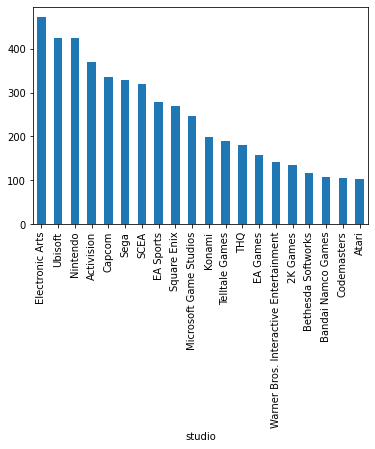

In [26]:
st_iger_na_studio = igre.groupby("studio").size().sort_values(ascending=False).head(20)
st_iger_na_studio.plot.bar()

<AxesSubplot:xlabel='studio'>

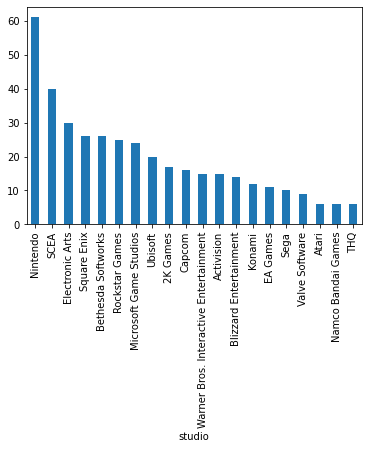

In [70]:
najboljse_igre = igre.head(500)
st_iger_na_studio_najboljse = najboljse_igre.groupby("studio").size().sort_values(ascending=False).head(20)
st_iger_na_studio_najboljse.plot.bar()

## Katere igre naj igram?

Kot vesten in delaven študent nimam časa, da bišas zapravil za iskanje videoiger za krajšanje prostega časa, ko bo ta le napočil. V ta namem sem pripravil algoritem, ki sprejem seznam iger, ki sem jih že igral in mojo platformo, ter mi vrne priporočila, katere igre bi me morda zanimale. Upošteva naslednje kriterije:
* Platforme, ki so mi na razpolago
* Žanr mojih iger
* Besedio v opisih iger
* Kvaliteta iger po naši metriki.

Da algoritem preizkusimo, sem sestavil seznam iger, ki sem jih preigral:

In [31]:
igre

,index,id,naslov,platforma,studio,mesec,leto,metascore,glasovi metascore,userscore,glasovi userscore,oznaka,stevilo igralcev,opis,prilagojen userscore,prilagojen metascore,prilagojena ocena
0,0,160692,The Legend of Zelda: Ocarina of Time,Nintendo 64,Nintendo,Nov,1998,99.0,22.0,9.1,5723.0,E,1.0,"As a young boy, Link is tricked by Ganondorf, ...",8.69,9.9,18.59
1,110,231309,The Witcher 3: Wild Hunt,PC,Warner Bros. Interactive Entertainment,May,2015,93.0,32.0,9.4,17482.0,M,1.0,With the Empire attacking the Kingdoms of the ...,9.26,9.3,18.56
2,58,305096,The Last of Us Remastered,PlayStation 4,SCEA,Jul,2014,95.0,70.0,9.2,14486.0,M,8.0,The Last of Us has been rebuilt for the PlaySt...,9.03,9.5,18.53
3,53,197529,The Last of Us,PlayStation 3,SCEA,Jun,2013,95.0,98.0,9.2,11951.0,M,8.0,Twenty years after a pandemic radically transf...,9.00,9.5,18.50
4,22,103028,Half-Life 2,PC,VU Games,Nov,2004,96.0,81.0,9.1,10760.0,M,1.0,"By taking the suspense, challenge and visceral...",8.88,9.6,18.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,9542,322597,Fenix Furia,PlayStation 4,Green Lava Studios,Jun,2016,71.0,8.0,5.0,4.0,E,NaN,"Fenix Rage is a stylish, aggravatingly addicti...",0.07,7.1,7.17
9705,9926,163033,Eragon,Game Boy Advance,Sierra Entertainment,Nov,2006,70.0,12.0,7.5,6.0,E10+,1.0,Play as Eragon and his dragon as they set out ...,0.16,7.0,7.16
9706,9954,163252,Still Life,Xbox,The Adventure Company,Jun,2005,70.0,29.0,7.0,6.0,M,1.0,"In Still Life, you play the role of Victoria M...",0.15,7.0,7.15
9707,9945,531025,Sparklite,PC,Merge Games,Nov,2019,70.0,7.0,6.5,6.0,E10+,1.0,Sparklite is an action-adventure set in the wh...,0.14,7.0,7.14


In [54]:
#test = igre[(igre.platforma == "PC")].sort_values("leto", ascending=False)
#test.reset_index(drop=True, inplace=True)
#test

,id,naslov,platforma,studio,mesec,leto,metascore,glasovi metascore,userscore,glasovi userscore,oznaka,stevilo igralcev,opis,prilagojen userscore,prilagojen metascore,prilagojena ocena
0,556956,Valorant,PC,Riot Games,Jun,2020,80.0,42.0,5.2,2907.0,T,10.0,A 5v5 character-based tactical shooter. Imagin...,4.76,8.0,12.76
1,525067,LUNA The Shadow Dust,PC,Coconut Island Games,Feb,2020,75.0,23.0,7.2,42.0,NaN,1.0,LUNA The Shadow Dust is a fully hand-animated ...,0.96,7.5,8.46
2,548043,Ghostrunner,PC,505 Games,Oct,2020,82.0,41.0,7.7,123.0,NaN,1.0,Ghostrunner is a hardcore FPP slasher packed w...,2.40,8.2,10.60
3,539937,Shantae and the Seven Sirens,PC,WayForward,May,2020,80.0,7.0,6.1,26.0,T,1.0,"New locations, abilities, and friends await in...",0.53,8.0,8.53
4,523253,Iratus: Lord of the Dead,PC,Unfrozen,Apr,2020,78.0,11.0,6.6,33.0,NaN,1.0,"Iratus: Lord of the Dead is a dark, challengin...",0.72,7.8,8.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2741,100798,Obsidian,PC,SegaSoft,Dec,1996,85.0,9.0,7.1,16.0,K-A,1.0,"You, as biochemical engineer Lilah Kerlin, and...",0.40,8.5,8.90
2742,100436,Command & Conquer: Red Alert,PC,Westwood Studios,Oct,1996,90.0,7.0,8.8,360.0,T,6.0,Surrender is not an option. Dark experiments h...,5.02,9.0,14.02
2743,100003,Quake,PC,id Software,Jun,1996,94.0,9.0,8.8,811.0,M,16.0,Rage through 32 single player levels and 6 dea...,6.59,9.4,15.99
2744,100418,Circle of Blood,PC,Virgin Interactive,Sep,1996,80.0,9.0,8.3,22.0,K-A,1.0,"(Known as ""Broken Sword"" in the UK) Play as Ge...",0.62,8.0,8.62


In [29]:
# igre[(len(igre.naslov) > 10)]
#igre[(igre["naslov"].apply(fun)) & (igre["platforma"] == "PC")].sort_values("prilagojena ocena")

In [61]:
def fun(naslov):
    return "Rocket" in naslov
igre[(igre["naslov"].apply(fun))].sort_values("prilagojena ocena")#["naslov"]

,id,naslov,platforma,studio,mesec,leto,metascore,glasovi metascore,userscore,glasovi userscore,oznaka,stevilo igralcev,opis,prilagojen userscore,prilagojen metascore,prilagojena ocena
9298,542389,Rocket Arena,Xbox One,Electronic Arts,Jul,2020,71.0,13.0,7.5,15.0,T,6.0,Welcome to a world where the rules are written...,0.39,7.1,7.49
9265,128143,Rocket Knight,Xbox 360,Konami,May,2010,72.0,28.0,7.7,11.0,E10+,1.0,Sparkster makes his triumphant arrival on next...,0.30,7.2,7.50
8841,192794,Rocketbirds: Hardboiled Chicken,PlayStation 3,Ratloop Asia Pte Ltd,Oct,2011,74.0,29.0,5.7,14.0,T,NaN,Rocketbirds: Hardboiled Chicken builds upon th...,0.28,7.4,7.68
8080,542388,Rocket Arena,PC,Electronic Arts,Jul,2020,73.0,28.0,5.0,41.0,T,6.0,Welcome to a world where the rules are written...,0.66,7.3,7.96
6808,111317,Rocket Riot,Xbox 360,THQ,Jun,2009,80.0,32.0,7.6,14.0,E,8.0,"Strap on your bazooka soldier, and get ready f...",0.37,8.0,8.37
6350,226749,Rocketbirds: Hardboiled Chicken,PlayStation Vita,Ratloop Asia Pte Ltd,Feb,2013,76.0,18.0,7.2,40.0,T,2.0,Rocketbirds: Hardboiled Chicken builds upon th...,0.92,7.6,8.52
6002,160986,ChuChu Rocket!,Game Boy Advance,Sega,Jun,2001,84.0,15.0,7.2,9.0,E,4.0,It'll take you a little while to get used to t...,0.23,8.4,8.63
4091,108168,Dragon Quest Heroes: Rocket Slime,DS,Square Enix,Sep,2006,83.0,41.0,7.8,52.0,E,1.0,"(Known in Japan as ""Slime Mori Mori Dragon Que...",1.25,8.3,9.55
1262,511021,Rocket League,Switch,Psyonix,Nov,2017,86.0,32.0,8.0,288.0,E,8.0,Rocket League is a high-powered hybrid of arca...,4.12,8.6,12.72
1132,495891,Rocket League,Xbox One,505 Games,Feb,2016,87.0,22.0,8.1,297.0,E,8.0,Fire your rockets. High-octane team sports. Ge...,4.23,8.7,12.93
